<a href="https://colab.research.google.com/github/gunhokim-me/first-ML/blob/master/DecisionTree_Sample_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

# 데이터 수집

In [2]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [3]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

# 데이터 시각화

Text(0.5, 1.0, 'district visualization in 2d plane')

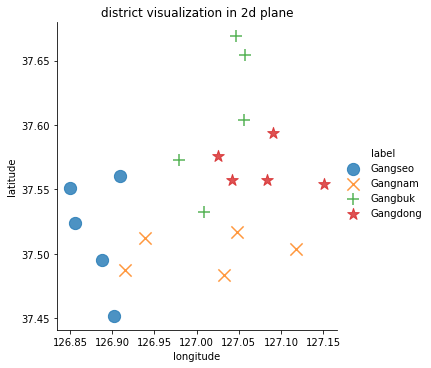

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='longitude', y='latitude', data=train_df, fit_reg=False, scatter_kws={'s' : 150}, markers=['o', 'x', '+', '*'], hue='label')

plt.title('district visualization in 2d plane')

# 데이터 다듬기

In [5]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [6]:
X_train.head()

,longitude,latitude
0,126.849500,37.551000
1,126.855396,37.524240
2,126.887400,37.495400
3,126.902000,37.451900
4,126.908728,37.560229


# 모델 학습

In [34]:
from sklearn import tree
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train.values.ravel())
clf = tree.DecisionTreeClassifier(random_state=35,).fit(X_train.values, y_encoded)



In [35]:
def display_decision_surface(clf, X, y) :
  x_min = X.longitude.min() - 0.01
  x_max = X.longitude.max() + 0.01
  y_min = X.latitude.min() - 0.01
  y_max = X.latitude.max() + 0.01

  n_classes = len(le.classes_)
  plot_colors = 'rywb'
  plot_step = 0.001

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  for i , color in zip(range(n_classes), plot_colors) :
    idx = np.where(y == i)
    plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=200)

  plt.title('Decision surface of a dicision tree', fontsize=16)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
  plt.xlabel('longitude',fontsize=16)
  plt.ylabel('latitude', fontsize=16)
  plt.rcParams['figure.figsize'] = [7,5]
  plt.rcParams['font.size'] = 14
  plt.rcParams['xtick.labelsize'] = 14
  plt.rcParams['ytick.labelsize'] = 14
  plt.show()

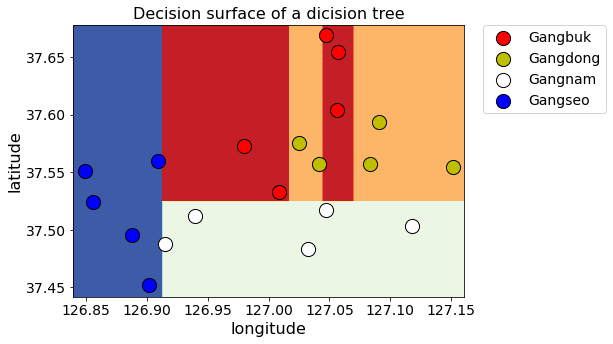

In [36]:
display_decision_surface(clf, X_train, y_encoded)

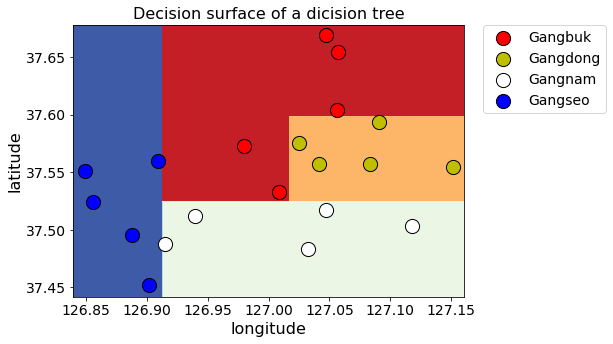

In [41]:
clf = tree.DecisionTreeClassifier(max_depth=4,
                                  min_samples_split=2,
                                  min_samples_leaf=2,
                                  random_state=70).fit(X_train.values, y_encoded.ravel())
display_decision_surface(clf, X_train, y_encoded)

# 의사 결정 트리 시각화

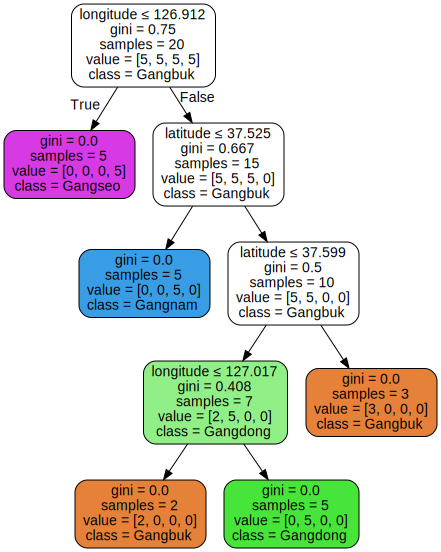

In [44]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('seoul')
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['longitude', 'latitude'],
                                class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

# 모델 테스트

In [46]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test.values)

In [48]:
print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 1.0


In [50]:
comparison = pd.DataFrame({'prediction' : le.classes_[pred],
                           'ground_truth' : y_test.values.ravel()})

comparison

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
